#Лабораторная работа №2
Студентка Самсонова Валерия, группа М8О-107М-22

###Часть 1
Найдем минимумы двух функций оптимизации с помощью двух алгоритмом бибилотеки PyGMO

Устанавливаем PyGMO

In [2]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.1 MB/s 


Подключаем необходимые библиотеки

In [3]:
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
import cv2

Функция Гольдшейна-Прайса

In [4]:
class GP_E:
  def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
  def fitness(self, x):
        return [(1+(x[0]+x[1]+1)**2 * (19-14*x[0]+3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2))*(30+(2*x[0]-3*x[1])**2 * (18-32*x[0]+12*x[0]**2+48*x[1]-36*x[0]*x[1]+27*x[1]**2))]
  def get_bounds(self):
        return ([self.x_min, self.y_min],[self.x_max, self.y_max])

Функция Химмельблау

In [5]:
class H_E:
  def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
  def fitness(self, x):
        return [(x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2]
  def get_bounds(self):
        return ([self.x_min, self.y_min],[self.x_max, self.y_max])

Создаем проблему

In [10]:
def CreateProblem(E):
  prob = pg.problem(E)
  #Вывод информации о проблеме на экран
  #print(prob)
  return prob

Алгоритм колонии пчел

In [11]:
def BeeColony(prob):
  algo = pg.algorithm(pg.bee_colony(gen = 10, limit = 10))
  pop = pg.population(prob, size = 100)
  pop = algo.evolve(pop)
  print("Минимум функции по алгоритму колонии пчел = {}".format(pop.champion_f))
  return (algo, pop)

Алгоритм серых волков

In [12]:
def GrayWolves(prob):
  algo = pg.algorithm(pg.gwo(gen = 10))
  pop = pg.population(prob, size = 100)
  pop = algo.evolve(pop)
  print("Минимум функции по алгоритму серых волков = {}".format(pop.champion_f))
  return (algo, pop)

График

In [13]:
def Show(prob, algo, pop):
  # Количество Эволюций
  number_of_evolutions = 100
  # Пустые контейнеры
  individuals_list = []
  fitness_list = []
  # Произведём эволюцию несколько раз
  for i in range(number_of_evolutions):
      pop = algo.evolve(pop)
      individuals_list.append(pop.get_x()[pop.best_idx()])
      fitness_list.append(pop.get_f()[pop.best_idx()])
  # Вытащим лучших индивидов из всех поколений
  best_x = [ind[0] for ind in individuals_list]
  best_y = [ind[1] for ind in individuals_list]
  # Выразим границы задачи
  (x_min, y_min), (x_max, y_max) = prob.get_bounds()
  # Изобразим функцию
  grid_points = 100
  x_vector = np.linspace(x_min, x_max, grid_points)
  y_vector = np.linspace(y_min, y_max, grid_points)
  x_grid, y_grid = np.meshgrid(x_vector, y_vector)
  z_grid = np.zeros((grid_points, grid_points))
  for i in range(x_grid.shape[1]):
      for j in range(x_grid.shape[0]):
          z_grid[i, j] = prob.fitness([x_grid[i, j], y_grid[i, j]])[0]
  # Создаем график
  fig, ax = plt.subplots(figsize=(9,5))
  cs = ax.contour(x_grid, y_grid, z_grid, 50)
  # Показываем лучших представителей за каждое поколение
  ax.scatter(best_x, best_y, marker='x', color='r')
  # Оформление
  ax.set_xlim((x_min, x_max))
  ax.set_ylim((y_min, y_max))
  ax.set_title('Функция', fontweight='bold')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  cbar = fig.colorbar(cs)
  cbar.ax.set_ylabel(r'Значение функции $f(x,y)$')
  plt.tight_layout()
  # Выводим на экран
  plt.show()

Вызов всех методов

In [14]:
def Start(prob):
  algo_pop = BeeColony(prob)
  Show(prob, algo_pop[0], algo_pop[1])
  algo_pop = GrayWolves(prob)
  Show(prob, algo_pop[0], algo_pop[1])

Тест для функции Гольдшейна-Прайса

Минимум функции по алгоритму колонии пчел = [3.02609552]


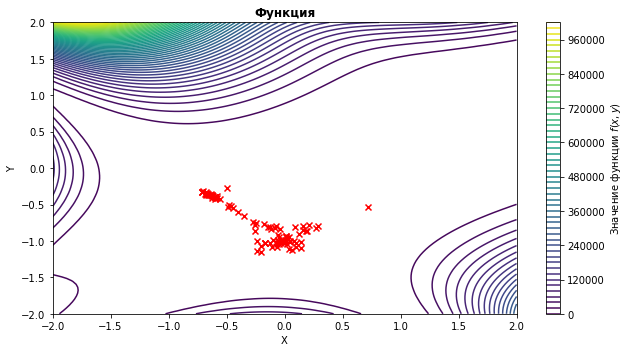

Минимум функции по алгоритму серых волков = [3.00111942]


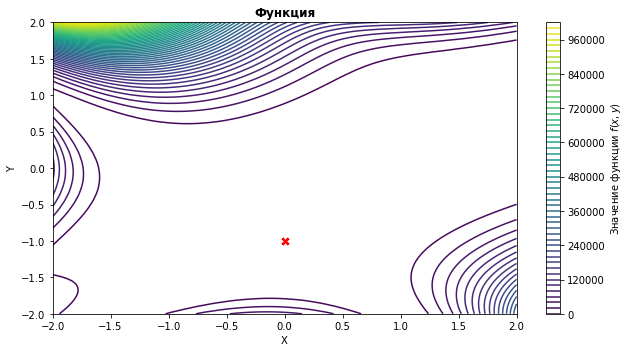

In [ ]:
prob = CreateProblem(GP_E(-2,-2,2,2))
Start(prob)

Тест для функции Химмельблау

Минимум функции по алгоритму колонии пчел = [0.00238771]


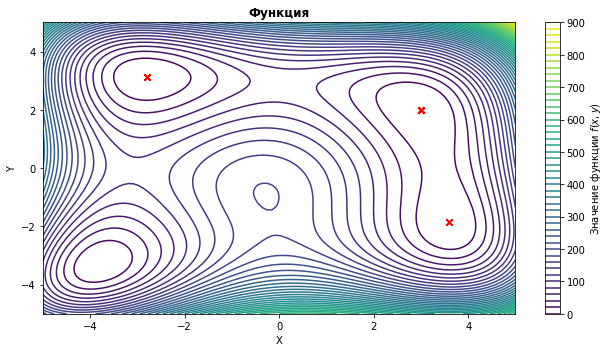

Минимум функции по алгоритму серых волков = [0.00209673]


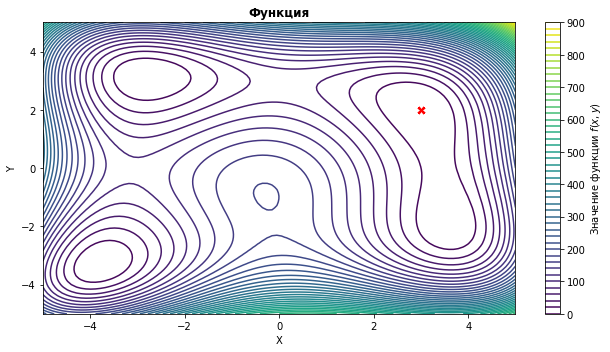

In [ ]:
prob = CreateProblem(H_E(-5,-5,5,5))
Start(prob)

###Часть 2
Создадим поверхность по изображению и найдем ее минимум

Загружаем изображение и переводим его в чб
*(зацените мой рисунок доспеха, я старалась :) )*

(1080, 741)


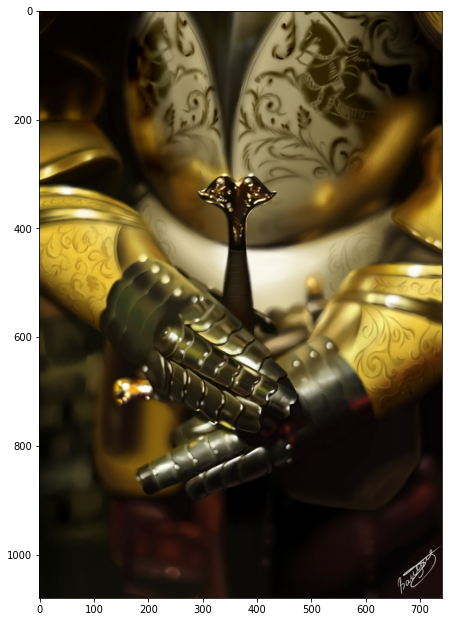

In [6]:
# Читаем изображение
img_path = "./Image.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Задаем размер
plt.figure(figsize=(img.shape[1]/100, img.shape[0]/100))
# Выводим на экран
plt.imshow(img)
#Делаем изображение черно-белым
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

Трансформируем изображение в поверхность

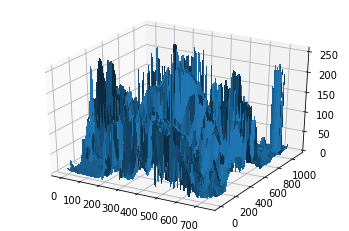

In [7]:
fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
X = np.arange(0, 741, 1)
Y = np.arange(0, 1080, 1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, img, linewidth=0, antialiased=False)
plt.show()

Создаем класс для новой поверхности

In [8]:
class Image:
    def __init__(self, img):
        self.data = img
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [self.data[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.data.shape[0]-1, self.data.shape[1]-1])

Создаем проблему и запускаем расчет

Минимум функции по алгоритму колонии пчел = [0.]


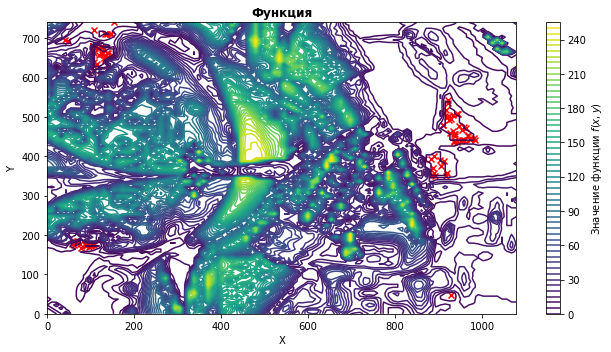

Минимум функции по алгоритму серых волков = [0.]


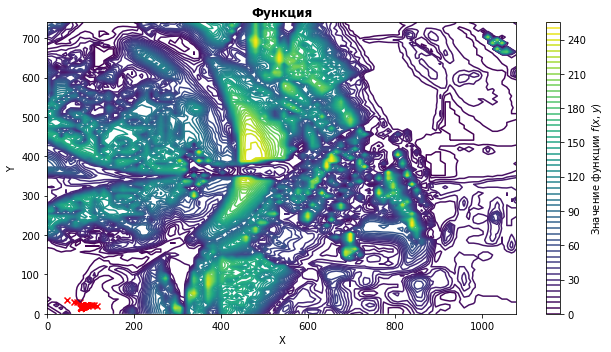

In [15]:
prob = pg.problem(Image(img)) 
Start(prob)